# Non-linear Fit Procedure

##### Initialize

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

Define the fitting function:  
$$
f(x) = a e^{-b x} + c
$$
with $a$, $b$ and $c$ the paramters to be determined in the fit.

In [2]:
def myfunc(x, a, b, c):
    return a * np.exp(-b * x) + c

Generate some data.

In [3]:
#define some data
xdata = np.linspace(0, 4, 50)
y = myfunc(xdata, 2.5, 1.3, 0.5)
# add some noise.
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

##### Prepare for the fitting.

Set some initial values to seed the fit procedure. 

In [4]:
a0, b0, c0 = 3, 2, 1

Fit the data to the model. The name of the function $myfunc$ is supplied as an argument in the call of the fit function. 

In [5]:
#the return values contain the fitparameters and the covariance matrix
popt, pcov = curve_fit(myfunc, xdata, ydata, p0=[a0, b0, c0], absolute_sigma=False)

Plot the result of the fit with the original data.

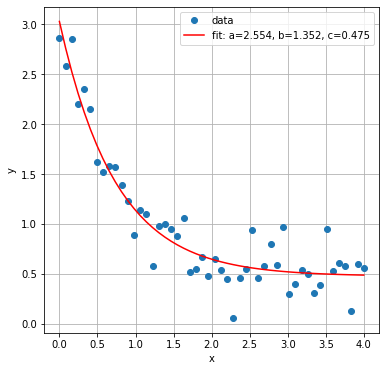

In [6]:
plt.figure(figsize=(6,6))
plt.plot(xdata, ydata, marker='o', lw=0, label='data')
plt.plot(xdata, myfunc(xdata, *popt), 'r-',
         label='fit: a={:5.3f}, b={:5.3f}, c={:5.3f}'.format(*tuple(popt)))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [7]:
print(f'The optimal parameters are: \na = {popt[0]:8.2f}, b = {popt[1]:8.2f} and c = {popt[2]:8.2f}')

# The standard diviations are the square root of the diagonoal elements of the covariance matrix pcov
stdev = np.sqrt(np.diag(pcov))
print(f'Corresponding standard deviations are: \nsa = {stdev[0]:8.2f}, sb = {stdev[1]:8.2f}, sc = {stdev[2]:8.2f}',)

The optimal parameters are: 
a =     2.55, b =     1.35 and c =     0.47
Corresponding standard deviations are: 
sa =     0.13, sb =     0.14, sc =     0.05
